# Load the dataset

In [11]:
import pandas as pd
df = pd.read_csv('loan.csv')
df.head()

C:\Users\91984\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

# Data cleanup

## Identify columns with only 1 unique value and drop them. These are features that provide no information

In [12]:
cols = df.columns
for c in cols:
    if df[c].nunique() <= 1:
        df.drop(c, axis = 1, inplace = True)

df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... total_rec_prncp total_rec_int  \
0   10.65%       162.87     B        B2  ...         5000.00        863.16   
1   15.27%        59.83     C        C4  ...          456.46        435.17   
2   15.96%        84.33     C        C5  ...         2400.00        605.67   
3   13.49%       339.31     C        C1  ...        10000.00       2214.92   
4   12.69%        67.79     B        B5  ...         2475.94       1037.39   

  total_rec_late_fee  recoveries collection_recovery_fee last_pymnt_d  \
0               0.00        0.00                    0.00       Jan-15   
1               0.00      117.08                    1.11       Apr-13   
2               0.00        0.00                    0.00       Jun-14   
3              16.97        0.00                    0.00       Jan-15   
4               0.00        0.00                    0.00       May-16   

  last_pymnt_amnt next_pymnt_d last_credit_pull_d pub_rec_bankruptcies  
0          171.62          NaN             May-16                  0.0  
1          119.66          NaN             Sep-13                  0.0  
2          649.91          NaN             May-16                  0.0  
3          357.48          NaN             Apr-16                  0.0  
4           67.79       Jun-16             May-16                  0.0  

[5 rows x 48 columns]

## Dropping text features as we need to use NLP methods to vectorize them. For the purpose of this exercise, we will drop them

In [13]:
nlp_cols = ['desc', 'emp_title', 'title', 'url']
df.drop(nlp_cols, axis = 1, inplace=True)

## Preprocessing Date features

In [14]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], errors='coerce')
df['earliest_cr_line'].head()

0   1985-01-01
1   1999-04-01
2          NaT
3   1996-02-01
4   1996-01-01
Name: earliest_cr_line, dtype: datetime64[ns]

### Some date features need special processing due to their non standard processing. only year and month is given, so we assume the date to be 01

In [15]:
df['issue_d'] = df['issue_d'].astype(str)
df['issue_d_year'] = df['issue_d'].apply(lambda x: int(x.split('-')[1])+2000 if len(x.split('-'))>1 else x.split('-')[0])
df['issue_d_month'] = df['issue_d'].apply(lambda x: x.split('-')[0])
df['issue_d'] = df['issue_d_month'] + '-01-' + df['issue_d_year'].astype(str)
df['issue_d'] = pd.to_datetime(df['issue_d'], errors='coerce')
df.drop(['issue_d_year', 'issue_d_month'], axis = 1, inplace = True)
df['issue_d'].head()

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
4   2011-12-01
Name: issue_d, dtype: datetime64[ns]

In [16]:
df['last_credit_pull_d'] = df['last_credit_pull_d'].astype(str)
df['last_credit_pull_year'] = df['last_credit_pull_d'].apply(lambda x: int(x.split('-')[1])+2000 if len(x.split('-'))>1 else x.split('-')[0])
df['last_credit_pull_month'] = df['last_credit_pull_d'].apply(lambda x: x.split('-')[0])
df['last_credit_pull_d'] = df['last_credit_pull_month'] + '-01-' + df['last_credit_pull_year'].astype(str)
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], errors='coerce')
df.drop(['last_credit_pull_year', 'last_credit_pull_month'], axis = 1, inplace = True)
df['last_credit_pull_d'].head()

0   2016-05-01
1   2013-09-01
2   2016-05-01
3   2016-04-01
4   2016-05-01
Name: last_credit_pull_d, dtype: datetime64[ns]

In [17]:
df['last_pymnt_d'] = df['last_pymnt_d'].astype(str)
df['last_pymnt_d_year'] = df['last_pymnt_d'].apply(lambda x: int(x.split('-')[1])+2000 if len(x.split('-'))>1 else x.split('-')[0])
df['last_pymnt_d_month'] = df['last_pymnt_d'].apply(lambda x: x.split('-')[0])
df['last_pymnt_d'] = df['last_pymnt_d_month'] + '-01-' + df['last_pymnt_d_year'].astype(str)
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], errors='coerce')
df.drop(['last_pymnt_d_year', 'last_pymnt_d_month'], axis = 1, inplace = True)
df['last_pymnt_d'].head()

0   2015-01-01
1   2013-04-01
2   2014-06-01
3   2015-01-01
4   2016-05-01
Name: last_pymnt_d, dtype: datetime64[ns]

In [18]:
df['next_pymnt_d'] = df['next_pymnt_d'].astype(str)
df['next_pymnt_d_year'] = df['next_pymnt_d'].apply(lambda x: int(x.split('-')[1])+2000 if len(x.split('-'))>1 else x.split('-')[0])
df['next_pymnt_d_month'] = df['next_pymnt_d'].apply(lambda x: x.split('-')[0])
df['next_pymnt_d'] = df['next_pymnt_d_month'] + '-01-' + df['next_pymnt_d_year'].astype(str)
df['next_pymnt_d'] = pd.to_datetime(df['next_pymnt_d'], errors='coerce')
df.drop(['next_pymnt_d_year', 'next_pymnt_d_month'], axis = 1, inplace = True)
df['next_pymnt_d'].head()

0          NaT
1          NaT
2          NaT
3          NaT
4   2016-06-01
Name: next_pymnt_d, dtype: datetime64[ns]

### Transform dates to continuous values (days) by calculating number of days elapsed since the date till today. This can help us to include date features in correlation analysis

In [19]:
today = pd.to_datetime('today')
df['d1'] = today - df['earliest_cr_line']
df.d1 = df.d1.dt.total_seconds()/86400.0
df.d1.head()

0    13376.774098
1     8173.774098
2             NaN
3     9328.774098
4     9359.774098
Name: d1, dtype: float64

In [20]:
df['d2'] = today - df['issue_d']
df.d2 = df.d2.dt.total_seconds()/86400.0

df['d3'] = today - df['last_credit_pull_d']
df.d3 = df.d3.dt.total_seconds()/86400.0

df['d4'] = today - df['last_pymnt_d']
df.d4 = df.d4.dt.total_seconds()/86400.0

df['d5'] = today - df['next_pymnt_d']
df.d5 = df.d5.dt.total_seconds()/86400.0

In [21]:
df.drop(['earliest_cr_line', 'issue_d', 'last_credit_pull_d', 'last_pymnt_d', 'next_pymnt_d'], axis = 1, inplace = True)

## Dropping columns with more than 40% null values. 40% is an arbitrary value chosen based on empirical guess work

In [22]:
cols = df.columns
for c in cols:
    null_count = df[c].isna().sum()
    if null_count > (0.4 * len(df)):
        df.drop(c, axis = 1, inplace = True)

df.head()


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... total_rec_int total_rec_late_fee  \
0   10.65%       162.87     B        B2  ...        863.16               0.00   
1   15.27%        59.83     C        C4  ...        435.17               0.00   
2   15.96%        84.33     C        C5  ...        605.67               0.00   
3   13.49%       339.31     C        C1  ...       2214.92              16.97   
4   12.69%        67.79     B        B5  ...       1037.39               0.00   

   recoveries collection_recovery_fee last_pymnt_amnt pub_rec_bankruptcies  \
0        0.00                    0.00          171.62                  0.0   
1      117.08                    1.11          119.66                  0.0   
2        0.00                    0.00          649.91                  0.0   
3        0.00                    0.00          357.48                  0.0   
4        0.00                    0.00           67.79                  0.0   

             d1           d2           d3           d4  
0  13376.774098  3546.774098  1933.774098  2419.774098  
1   8173.774098  3546.774098  2906.774098  3059.774098  
2           NaN  3546.774098  1933.774098  2633.774098  
3   9328.774098  3546.774098  1963.774098  2419.774098  
4   9359.774098  3546.774098  1933.774098  1933.774098  

[5 rows x 41 columns]

# Finding top driver variables

## The dependent variable is loan_status. Our goal is to find the top variables that influence loan_status

### Continuous variables

For continuous variables, we can leverage pearson correlation to estimate degree of influence. Value closer to 1 implies positive correlation and value closer -1 implies negative correlation. We are interested in variables at both ends of the spectrum

In [58]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['loan_status'] = le.fit_transform(df['loan_status'])
df['loan_status'].head()

0    2
1    0
2    2
3    2
4    1
Name: loan_status, dtype: int64

In [24]:
cont_vars = ['annual_inc',
 'collection_recovery_fee',
 'delinq_2yrs',
 'dti',
 'funded_amnt',
 'funded_amnt_inv',
 'inq_last_6mths',
 'installment',
 'int_rate',
 'last_pymnt_amnt',
 'loan_amnt',
 'open_acc',
 'out_prncp',
 'out_prncp_inv',
 'pub_rec',
 'pub_rec_bankruptcies',
 'recoveries',
 'revol_bal',
 'revol_util',
 'total_acc',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_int',
 'total_rec_late_fee',
 'total_rec_prncp',
            'd1', 'd2', 'd3', 'd4', 'loan_status']
correlation = df[cont_vars].corr()
correlation['loan_status']

annual_inc                 0.037053
collection_recovery_fee   -0.199591
delinq_2yrs               -0.019234
dti                       -0.049951
funded_amnt               -0.076350
funded_amnt_inv           -0.060091
inq_last_6mths            -0.067612
installment               -0.036132
last_pymnt_amnt            0.233293
loan_amnt                 -0.079476
open_acc                   0.004678
out_prncp                 -0.133108
out_prncp_inv             -0.132967
pub_rec                   -0.048212
pub_rec_bankruptcies      -0.045384
recoveries                -0.330683
revol_bal                 -0.011391
total_acc                  0.018919
total_pymnt                0.192413
total_pymnt_inv            0.187913
total_rec_int             -0.065559
total_rec_late_fee        -0.160246
total_rec_prncp            0.302839
d1                         0.010473
d2                         0.056527
d3                        -0.010197
d4                        -0.118498
loan_status                1

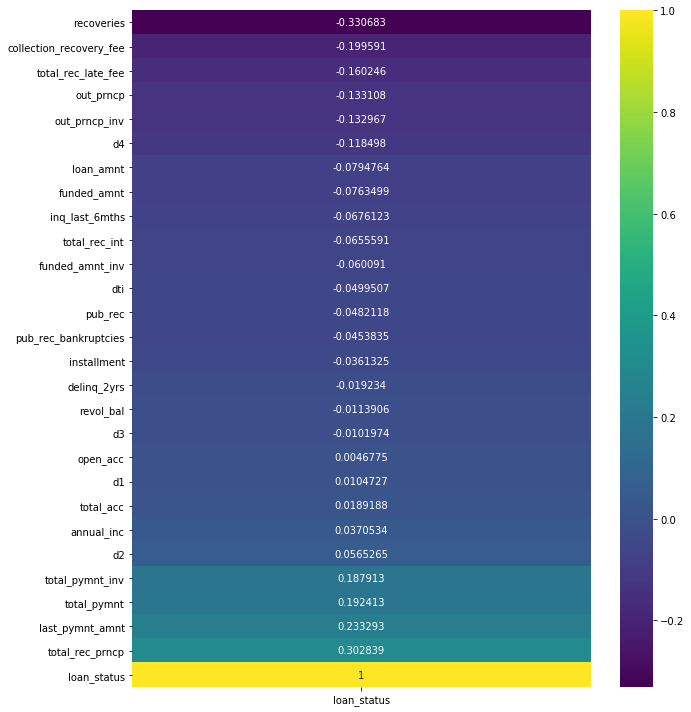

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
hdf = pd.DataFrame(correlation['loan_status'])
hdf = hdf.sort_values('loan_status')
plt.rcParams["figure.figsize"] = (10,10)
sns.heatmap(hdf, annot = True, fmt="g", cmap='viridis')
plt.tight_layout()
plt.savefig('correlation_plot.jpg')
plt.show()

In [37]:
corr_df = pd.DataFrame(correlation)
corr_df = corr_df.reset_index()
positive_corr = corr_df.sort_values('loan_status', ascending = False)
negative_corr = corr_df.sort_values('loan_status', ascending = True)
print('positive_correlation')
print(positive_corr[['index','loan_status']])
print('negative_correlation')
print(negative_corr[['index','loan_status']])

positive_correlation
                      index  loan_status
27              loan_status     1.000000
22          total_rec_prncp     0.302839
8           last_pymnt_amnt     0.233293
18              total_pymnt     0.192413
19          total_pymnt_inv     0.187913
24                       d2     0.056527
0                annual_inc     0.037053
17                total_acc     0.018919
23                       d1     0.010473
10                 open_acc     0.004678
25                       d3    -0.010197
16                revol_bal    -0.011391
2               delinq_2yrs    -0.019234
7               installment    -0.036132
14     pub_rec_bankruptcies    -0.045384
13                  pub_rec    -0.048212
3                       dti    -0.049951
5           funded_amnt_inv    -0.060091
20            total_rec_int    -0.065559
6            inq_last_6mths    -0.067612
4               funded_amnt    -0.076350
9                 loan_amnt    -0.079476
26                       d4    -0.11

### Categorical variables

Importance of categorical features can be determined by using Chi squared analysis. We will use the package available in sklearn for this

In [50]:
cat_vars = ['addr_state',
 'emp_length',
 'grade',
 'home_ownership',
 'purpose',
 'sub_grade',
 'term',
 'zip_code']
for c in cat_vars:
    df[c] = le.fit_transform(df[c])



In [51]:
from sklearn.feature_selection import chi2
X = df[cat_vars].values
y = df['loan_status'].values
a, b = chi2(X, y)

Null hypothesis of Chi2 analysis is that 2 variables are independent. So higher chi2 scores rejects this null hypothesis and may indicate that the variables are dependent

In [52]:
a = list(a)
index = sorted(range(len(a)), key = lambda x: a[x])
sorted_cat_vars = [cat_vars[i] for i in index]
print(sorted_cat_vars)

['emp_length', 'home_ownership', 'purpose', 'addr_state', 'grade', 'term', 'zip_code', 'sub_grade']


### Plotting the probability scores (probability of influencing loan_status) for the categorical variables

C:\Users\91984\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


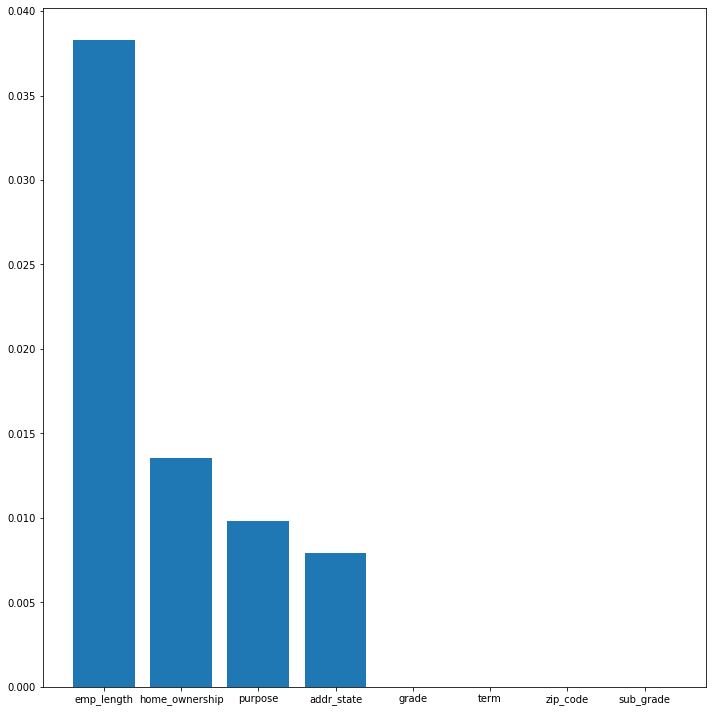

In [53]:
import numpy as np
b = [-1/np.log(b[i]) for i in index]
plt.bar(sorted_cat_vars, b)
plt.tight_layout()
plt.savefig('chi2_plot.jpg')
plt.show()

# Conclusion

We will select top 10 positively correlated, and top 10 negatively correlated variables from the continuous variables set. From categorical variables we will pick the 4 variables that had greater than 0 probability of dependence

In [57]:
selected_vars = positive_corr[1:11]['index'].tolist() + negative_corr[:10]['index'].tolist() + ['emp_length', 'home_ownership', 'purpose', 'addr_state']
print(selected_vars)

['total_rec_prncp', 'last_pymnt_amnt', 'total_pymnt', 'total_pymnt_inv', 'd2', 'annual_inc', 'total_acc', 'd1', 'open_acc', 'd3', 'recoveries', 'collection_recovery_fee', 'total_rec_late_fee', 'out_prncp', 'out_prncp_inv', 'd4', 'loan_amnt', 'funded_amnt', 'inq_last_6mths', 'total_rec_int', 'emp_length', 'home_ownership', 'purpose', 'addr_state']


d1, d2, d3 and d4 are derived variables from the date features. These are derived from earliest_cr_line, issue_d, last_credit_pull_d and last_pymnt_d respectively.

In [59]:
df1 = pd.DataFrame({'a':selected_vars})
df1.to_csv('selected_vars.csv', index = False)